In [13]:
from ehrhart_quasi_polynomial import *

## Right Isosceles Triangle

In [2]:
B = PolynomialRing(QQ, "b")
b = B.gen()

T = PolynomialRing(B, "t")
t = T.gen()

In [3]:
A = Matrix([[-1,  0],
            [ 0, -1],
            [ 1,  1]])
b = free_module_element([0, 0, 0])

In [4]:
def create_polyhedron(A, b):
    """  Ax <= b  """
    inequalities = [[b[k]] + list(-A.rows()[k]) for k in range(A.nrows())]
    return Polyhedron(ieqs = inequalities)

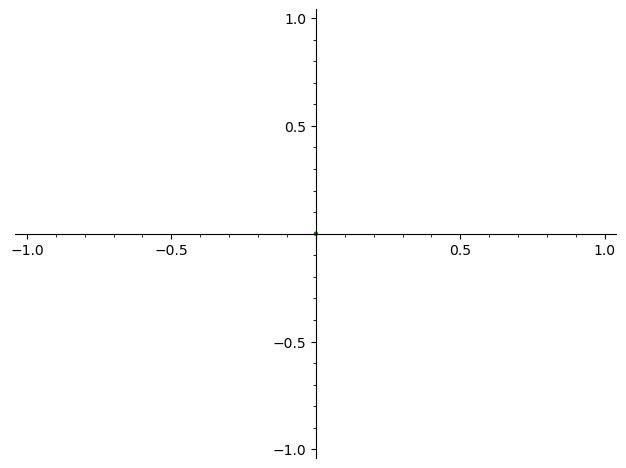

In [5]:
tri = create_polyhedron(A, b)
tri.plot()

In [8]:
print(ehrhart_quasi_polynomial(tri.Vrepresentation()))

QuasiPolynomial given by 
[1]


In [15]:
from ehrhart_quasi_polynomial.ehrhart_quasi_polynomial import _get_bounding_box
def modular_b(A, base_b, indeces=[0], expected_degree=2):
    dim_points = A.ncols()
    dim_b = len(base_b)
    mins, maxs = [0]*dim_b, [0]*dim_b
    value = expected_degree
    for index in indeces:
        maxs[index] = value

    return _get_bounding_box(mins, maxs, 1)

for delta_b = (0, 0, 0):
QuasiPolynomial given by 
[1]

for delta_b = (0, 0, 1):
QuasiPolynomial given by 
[1] + [3/2]*k + [1/2]*k^2

for delta_b = (0, 0, 2):
QuasiPolynomial given by 
[1] + [3]*k + [2]*k^2

for delta_b = (0, 0, 3):
QuasiPolynomial given by 
[1] + [9/2]*k + [9/2]*k^2

for delta_b = (0, 0, 4):
QuasiPolynomial given by 
[1] + [6]*k + [8]*k^2

for delta_b = (0, 0, 5):
QuasiPolynomial given by 
[1] + [15/2]*k + [25/2]*k^2



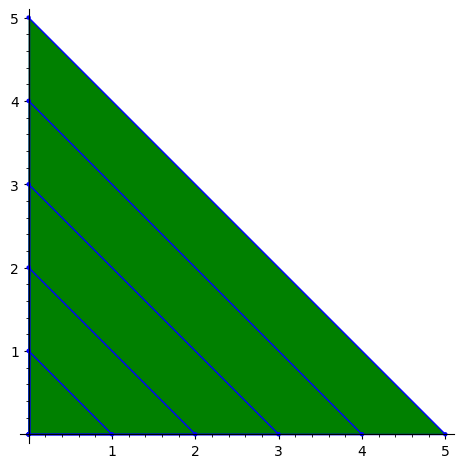

In [17]:
g = Graphics()
points = modular_b(A, b, indeces=[2], expected_degree=5)
for point in points:
    print(f"for delta_b = {point}:")
    qoly = create_polyhedron(A, b + free_module_element(point))
    g += qoly.plot()
    print(ehrhart_quasi_polynomial(qoly.Vrepresentation()))
    print()
g.show()

In [18]:
linear_term = B.lagrange_polynomial([[0, 1.5], [1, 3], [2, 4.5]])
quadratic_term = B.lagrange_polynomial([[0, 0.5], [1, 2.0], [2, 4.5], [3, 8.0]])
print(f"linear term: {linear_term}")
print(f"quadratic term: {quadratic_term}")

linear term: 3/2*b + 3/2
quadratic term: 1/2*b^2 + b + 1/2


In [19]:
poly = 1 + linear_term*t + quadratic_term*t**2
print("The general ehrhart polynomial of this family of triangles is:")
print("\t", poly)
print("Where b is the third element of the b-vector, and t is the scaling coefficient of the ehrhart polynomial.")

The general ehrhart polynomial of this family of triangles is:
	 (1/2*b^2 + b + 1/2)*t^2 + (3/2*b + 3/2)*t + 1
Where b is the third element of the b-vector, and t is the scaling coefficient of the ehrhart polynomial.
